## Introduction to pandas

In [1277]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({'font.size':16}) 

In [1278]:
exo_df = pd.read_csv('data/Exoplanet_catalog_2019.csv')

In [1279]:
exo_df.head()

,# name,orbital_period,semi_major_axis,eccentricity,discovered,detection_type,star_name,star_distance,star_metallicity,star_mass,star_sp_type
0,11 Com b,326.03,1.29,0.231,2008.0,Radial Velocity,11 Com,110.60,-0.35,2.70,G8 III
1,11 UMi b,516.22,1.54,0.080,2009.0,Radial Velocity,11 UMi,119.50,0.04,1.80,K4III
2,14 And b,185.84,0.83,0.000,2008.0,Radial Velocity,14 And,76.40,-0.24,2.20,K0III
3,14 Her b,1773.40,2.77,0.369,2002.0,Radial Velocity,14 Her,18.10,0.43,0.90,K0 V
4,16 Cyg B b,799.50,1.68,0.689,1996.0,Radial Velocity,16 Cyg B,21.41,0.08,1.01,G2.5 V


In [1280]:
exo_df.columns

Index(['# name', 'orbital_period', 'semi_major_axis', 'eccentricity',
       'discovered', 'detection_type', 'star_name', 'star_distance',
       'star_metallicity', 'star_mass', 'star_sp_type'],
      dtype='object')

In [1281]:
exo_df.rename(columns={'# name':'name'}, inplace=True)
exo_df.columns

Index(['name', 'orbital_period', 'semi_major_axis', 'eccentricity',
       'discovered', 'detection_type', 'star_name', 'star_distance',
       'star_metallicity', 'star_mass', 'star_sp_type'],
      dtype='object')

In [1282]:
exo_df[['orbital_period', 'name', 'detection_type']]

,orbital_period,name,detection_type
0,326.03000,11 Com b,Radial Velocity
1,516.22000,11 UMi b,Radial Velocity
2,185.84000,14 And b,Radial Velocity
3,1773.40000,14 Her b,Radial Velocity
4,799.50000,16 Cyg B b,Radial Velocity
...,...,...,...
3827,305.50000,tau Gem b,Radial Velocity
3828,4.61711,ups And b,Radial Velocity
3829,240.93700,ups And c,Radial Velocity
3830,1281.43900,ups And d,Radial Velocity


In [1283]:
exo_df[exo_df['detection_type']=='Radial Velocity']

,name,orbital_period,semi_major_axis,eccentricity,discovered,detection_type,star_name,star_distance,star_metallicity,star_mass,star_sp_type
0,11 Com b,326.03000,1.2900,0.23100,2008.0,Radial Velocity,11 Com,110.60,-0.35,2.70,G8 III
1,11 UMi b,516.22000,1.5400,0.08000,2009.0,Radial Velocity,11 UMi,119.50,0.04,1.80,K4III
2,14 And b,185.84000,0.8300,0.00000,2008.0,Radial Velocity,14 And,76.40,-0.24,2.20,K0III
3,14 Her b,1773.40000,2.7700,0.36900,2002.0,Radial Velocity,14 Her,18.10,0.43,0.90,K0 V
4,16 Cyg B b,799.50000,1.6800,0.68900,1996.0,Radial Velocity,16 Cyg B,21.41,0.08,1.01,G2.5 V
...,...,...,...,...,...,...,...,...,...,...,...
3827,tau Gem b,305.50000,1.1700,0.03100,2004.0,Radial Velocity,tau Gem,98.40,0.14,2.30,K2III
3828,ups And b,4.61711,0.0590,0.01186,1996.0,Radial Velocity,ups And,13.47,0.09,1.27,F8 V
3829,ups And c,240.93700,0.8610,0.24450,1999.0,Radial Velocity,ups And,13.47,0.09,1.27,F8 V
3830,ups And d,1281.43900,2.5500,0.31600,1999.0,Radial Velocity,ups And,13.47,0.09,1.27,F8 V


In [1284]:
exo_df[exo_df['orbital_period']>250]

,name,orbital_period,semi_major_axis,eccentricity,discovered,detection_type,star_name,star_distance,star_metallicity,star_mass,star_sp_type
0,11 Com b,326.030,1.2900,0.23100,2008.0,Radial Velocity,11 Com,110.60,-0.350,2.700,G8 III
1,11 UMi b,516.220,1.5400,0.08000,2009.0,Radial Velocity,11 UMi,119.50,0.040,1.800,K4III
3,14 Her b,1773.400,2.7700,0.36900,2002.0,Radial Velocity,14 Her,18.10,0.430,0.900,K0 V
4,16 Cyg B b,799.500,1.6800,0.68900,1996.0,Radial Velocity,16 Cyg B,21.41,0.080,1.010,G2.5 V
5,18 Del b,993.300,2.6000,0.08000,2008.0,Radial Velocity,18 Del,73.10,-0.052,2.300,G6III
...,...,...,...,...,...,...,...,...,...,...,...
3821,sig Per b,579.800,1.8000,0.30000,2014.0,Radial Velocity,sig Per,108.30,-0.220,2.250,K3III
3824,tau Cet f,636.130,1.3340,0.16000,2012.0,Radial Velocity,tau Cet,3.65,-0.550,0.783,G8.5 V
3827,tau Gem b,305.500,1.1700,0.03100,2004.0,Radial Velocity,tau Gem,98.40,0.140,2.300,K2III
3830,ups And d,1281.439,2.5500,0.31600,1999.0,Radial Velocity,ups And,13.47,0.090,1.270,F8 V


In [1285]:
exo_df[exo_df['eccentricity']<0.15]

,name,orbital_period,semi_major_axis,eccentricity,discovered,detection_type,star_name,star_distance,star_metallicity,star_mass,star_sp_type
1,11 UMi b,516.22000,1.5400,0.08000,2009.0,Radial Velocity,11 UMi,119.5000,0.040,1.800,K4III
2,14 And b,185.84000,0.8300,0.00000,2008.0,Radial Velocity,14 And,76.4000,-0.240,2.200,K0III
5,18 Del b,993.30000,2.6000,0.08000,2008.0,Radial Velocity,18 Del,73.1000,-0.052,2.300,G6III
7,24 Boo b,30.35060,0.1900,0.04200,2018.0,Radial Velocity,24 Boo,100.0000,-0.770,0.990,G3IV
8,24 Sex b,452.80000,1.3330,0.09000,2010.0,Radial Velocity,24 Sex,72.2084,-0.030,1.540,G5
...,...,...,...,...,...,...,...,...,...,...,...
3822,tau Boo b,3.31249,0.0460,0.07870,1996.0,Radial Velocity,tau Boo,15.6000,0.280,1.300,F7 V
3825,tau Cet g,20.00000,0.1330,0.06000,2017.0,Radial Velocity,tau Cet,3.6500,-0.550,0.783,G8.5 V
3827,tau Gem b,305.50000,1.1700,0.03100,2004.0,Radial Velocity,tau Gem,98.4000,0.140,2.300,K2III
3828,ups And b,4.61711,0.0590,0.01186,1996.0,Radial Velocity,ups And,13.4700,0.090,1.270,F8 V


In [1286]:
exo_df[(exo_df['orbital_period']>250) & (exo_df['eccentricity']<0.15)]

,name,orbital_period,semi_major_axis,eccentricity,discovered,detection_type,star_name,star_distance,star_metallicity,star_mass,star_sp_type
1,11 UMi b,516.22,1.5400,0.08000,2009.0,Radial Velocity,11 UMi,119.5000,0.040,1.80,K4III
5,18 Del b,993.30,2.6000,0.08000,2008.0,Radial Velocity,18 Del,73.1000,-0.052,2.30,G6III
8,24 Sex b,452.80,1.3330,0.09000,2010.0,Radial Velocity,24 Sex,72.2084,-0.030,1.54,G5
11,38 Vir b,825.90,1.8200,0.03000,2016.0,Primary Transit,38 Vir,NaN,0.070,1.18,F6 V
14,47 Uma b,1078.00,2.1000,0.03200,1996.0,Radial Velocity,47 Uma,13.9700,0.000,1.03,G0V
...,...,...,...,...,...,...,...,...,...,...,...
3813,mu Leo b,357.80,1.1000,0.09000,2014.0,Radial Velocity,mu Leo,38.0500,0.300,1.50,K2III
3814,nu Oph b,530.21,1.7900,0.12400,2004.0,Radial Velocity,nu Oph,46.8000,0.130,3.04,K0III
3816,ome Ser b,277.02,1.1000,0.10600,2013.0,Radial Velocity,ome Ser,80.6000,-0.240,2.17,G8 III
3827,tau Gem b,305.50,1.1700,0.03100,2004.0,Radial Velocity,tau Gem,98.4000,0.140,2.30,K2III


## Cleaning data with pandas

In [1287]:
# To replace gaps with NaN
exo_df[exo_df.isna().any(axis=1)]

,name,orbital_period,semi_major_axis,eccentricity,discovered,detection_type,star_name,star_distance,star_metallicity,star_mass,star_sp_type
6,1SWASP J1407 b,3725.000000,3.90000,NaN,2012.0,Primary Transit,1SWASP J1407,133.000,NaN,0.900,NaN
11,38 Vir b,825.900000,1.82000,0.030,2016.0,Primary Transit,38 Vir,NaN,0.07,1.180,F6 V
30,75 Cet b,691.900000,2.10000,NaN,2012.0,Radial Velocity,75 Cet,81.500,0.00,2.490,G3III
34,AD 3116 b,1.982796,NaN,0.146,2017.0,Primary Transit,AD 3116,186.540,NaN,0.276,M3.9
35,AD Leo b,2.225990,0.02500,0.030,2019.0,Radial Velocity,AD Leo,4.966,NaN,NaN,M4V
...,...,...,...,...,...,...,...,...,...,...,...
3794,beta Pic c,1238.000000,2.72000,0.248,2019.0,Radial Velocity,beta Pic,19.300,NaN,1.730,A6V
3798,eps Ind A b,16509.000000,11.55000,0.260,2018.0,Radial Velocity,eps Ind A,3.620,NaN,0.762,K2V
3807,kepler-80 g,14.645580,0.14000,NaN,2017.0,Primary Transit,Kepler-80,NaN,-0.56,NaN,NaN
3818,omi UMa b,1630.000000,3.90000,NaN,2012.0,Radial Velocity,omi UMa,56.300,-0.09,3.090,G4II-III


In [1288]:
# Rows with no gaps
exo_df[~exo_df.isna().any(axis=1)]

,name,orbital_period,semi_major_axis,eccentricity,discovered,detection_type,star_name,star_distance,star_metallicity,star_mass,star_sp_type
0,11 Com b,326.03000,1.2900,0.23100,2008.0,Radial Velocity,11 Com,110.60,-0.35,2.70,G8 III
1,11 UMi b,516.22000,1.5400,0.08000,2009.0,Radial Velocity,11 UMi,119.50,0.04,1.80,K4III
2,14 And b,185.84000,0.8300,0.00000,2008.0,Radial Velocity,14 And,76.40,-0.24,2.20,K0III
3,14 Her b,1773.40000,2.7700,0.36900,2002.0,Radial Velocity,14 Her,18.10,0.43,0.90,K0 V
4,16 Cyg B b,799.50000,1.6800,0.68900,1996.0,Radial Velocity,16 Cyg B,21.41,0.08,1.01,G2.5 V
...,...,...,...,...,...,...,...,...,...,...,...
3827,tau Gem b,305.50000,1.1700,0.03100,2004.0,Radial Velocity,tau Gem,98.40,0.14,2.30,K2III
3828,ups And b,4.61711,0.0590,0.01186,1996.0,Radial Velocity,ups And,13.47,0.09,1.27,F8 V
3829,ups And c,240.93700,0.8610,0.24450,1999.0,Radial Velocity,ups And,13.47,0.09,1.27,F8 V
3830,ups And d,1281.43900,2.5500,0.31600,1999.0,Radial Velocity,ups And,13.47,0.09,1.27,F8 V


In [1289]:
planet_df = exo_df[['name', 'orbital_period', 'semi_major_axis', 'detection_type', 'star_mass']]

In [1290]:
planet_df.head()

,name,orbital_period,semi_major_axis,detection_type,star_mass
0,11 Com b,326.03,1.29,Radial Velocity,2.70
1,11 UMi b,516.22,1.54,Radial Velocity,1.80
2,14 And b,185.84,0.83,Radial Velocity,2.20
3,14 Her b,1773.40,2.77,Radial Velocity,0.90
4,16 Cyg B b,799.50,1.68,Radial Velocity,1.01


In [1291]:
# How many of these rows contain gaps
planet_df[planet_df.isna().any(axis=1)].shape

(1783, 5)

In [1292]:
# To remove any rows with missing data
planet_df.dropna(inplace=True)

C:\Users\amaia\AppData\Local\Temp\ipykernel_2324\2047418960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planet_df.dropna(inplace=True)


This is a warning, not an error. Here the warning is telling us that we're editing a copy of part of another dataframe, not the original dataframe. That's exactly what we intended here so it's not a problem. It becomes more important when you're doing more complex data analysis.

In [1293]:
print("Rows with gaps before cleaning:", planet_df[planet_df.isna().any(axis=1)])
print("Number of rows with gaps before cleaning:", planet_df[planet_df.isna().any(axis=1)].shape)

Rows with gaps before cleaning: Empty DataFrame
Columns: [name, orbital_period, semi_major_axis, detection_type, star_mass]
Index: []
Number of rows with gaps before cleaning: (0, 5)


In [1294]:
planet_df[~planet_df.isna().any(axis=1)]

,name,orbital_period,semi_major_axis,detection_type,star_mass
0,11 Com b,326.03000,1.2900,Radial Velocity,2.70
1,11 UMi b,516.22000,1.5400,Radial Velocity,1.80
2,14 And b,185.84000,0.8300,Radial Velocity,2.20
3,14 Her b,1773.40000,2.7700,Radial Velocity,0.90
4,16 Cyg B b,799.50000,1.6800,Radial Velocity,1.01
...,...,...,...,...,...
3827,tau Gem b,305.50000,1.1700,Radial Velocity,2.30
3828,ups And b,4.61711,0.0590,Radial Velocity,1.27
3829,ups And c,240.93700,0.8610,Radial Velocity,1.27
3830,ups And d,1281.43900,2.5500,Radial Velocity,1.27


In [1295]:
print("Number of rows without gaps after cleaning:", planet_df[~planet_df.isna().any(axis=1)].shape)

Number of rows without gaps after cleaning: (2049, 5)


## Analysing dataframes

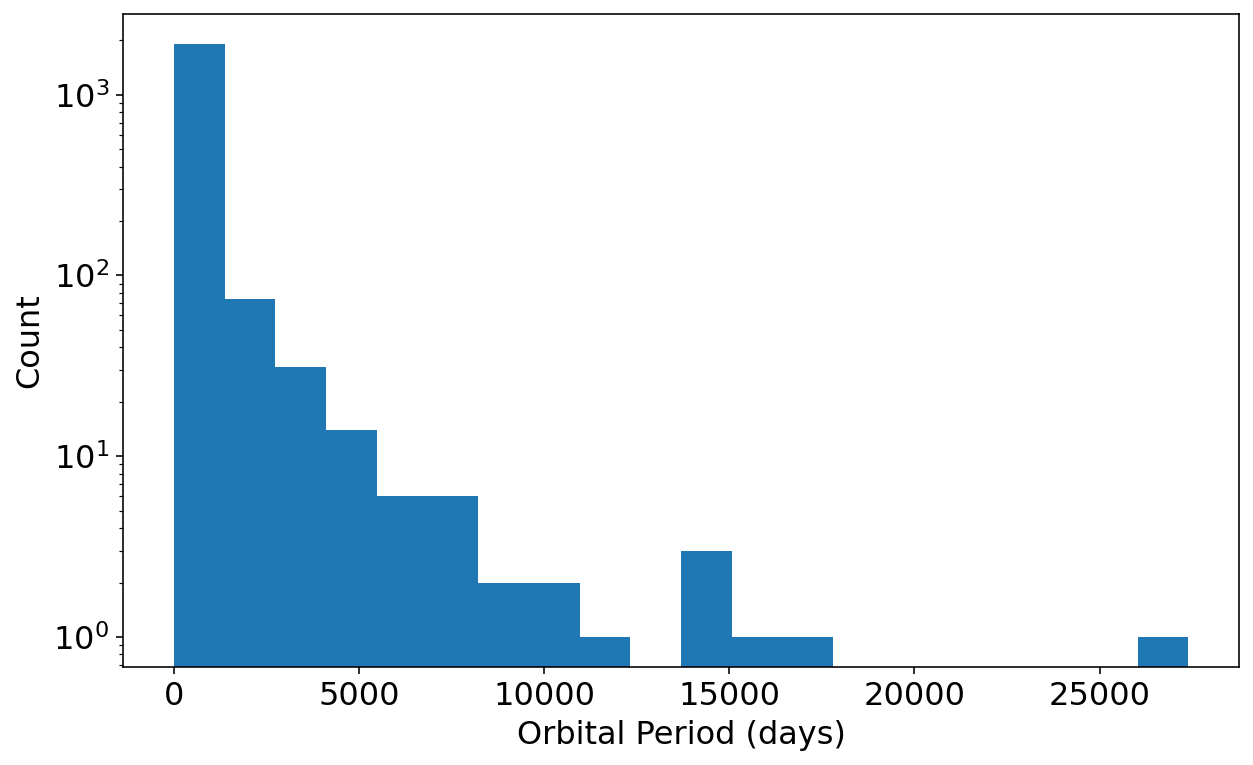

In [1296]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.hist(planet_df['orbital_period'], bins=20)
ax.set_xlabel('Orbital Period (days)')
ax.set_ylabel('Count')
ax.set_yscale('log') ## set the y-axis to log scale so we can see the details
plt.show()

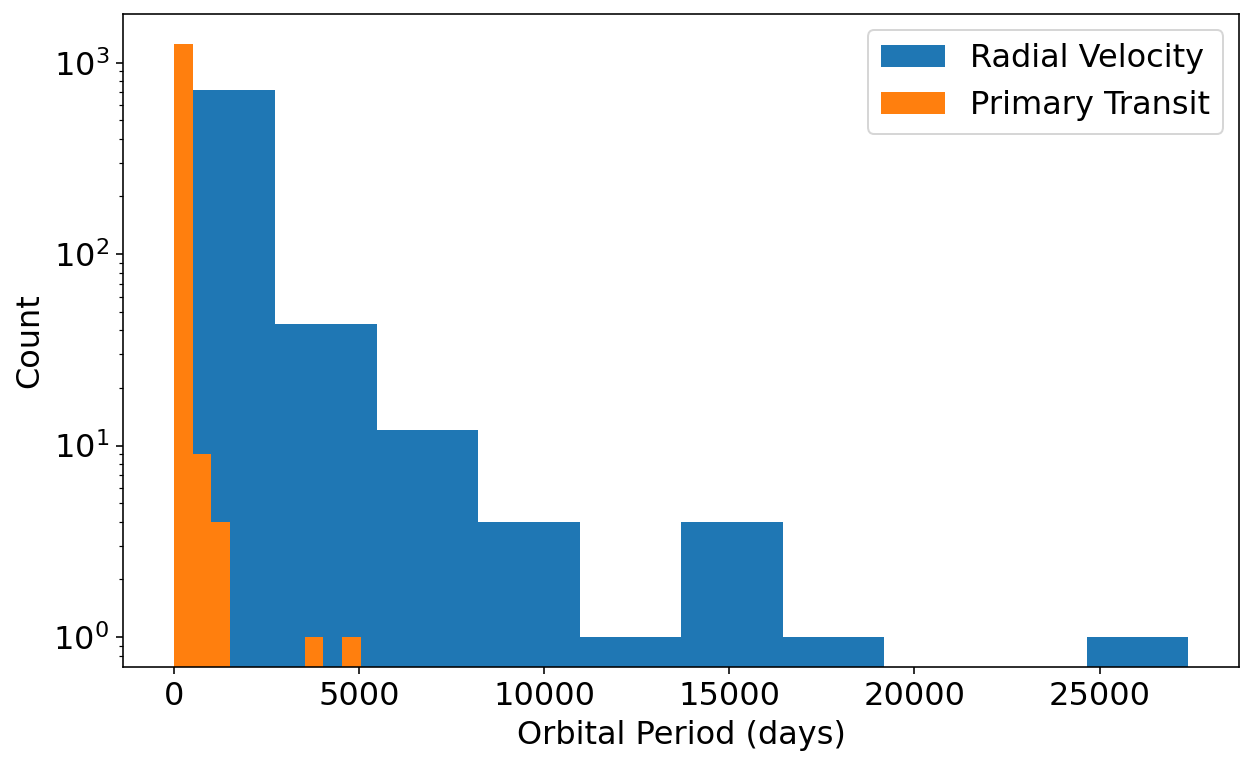

In [1297]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.hist(planet_df['orbital_period'].where(planet_df['detection_type']=='Radial Velocity'), label='Radial Velocity')
ax.hist(planet_df['orbital_period'].where(planet_df['detection_type']=='Primary Transit'), label='Primary Transit')
ax.set_xlabel('Orbital Period (days)')
ax.set_ylabel('Count')
ax.set_yscale('log') ## set the y-axis to log scale so we can see the details
ax.legend()
plt.show()

In [1298]:
planet_df['orbital_period'].min()

0.07943002

In [1299]:
planet_df['orbital_period'].max()

27400.0

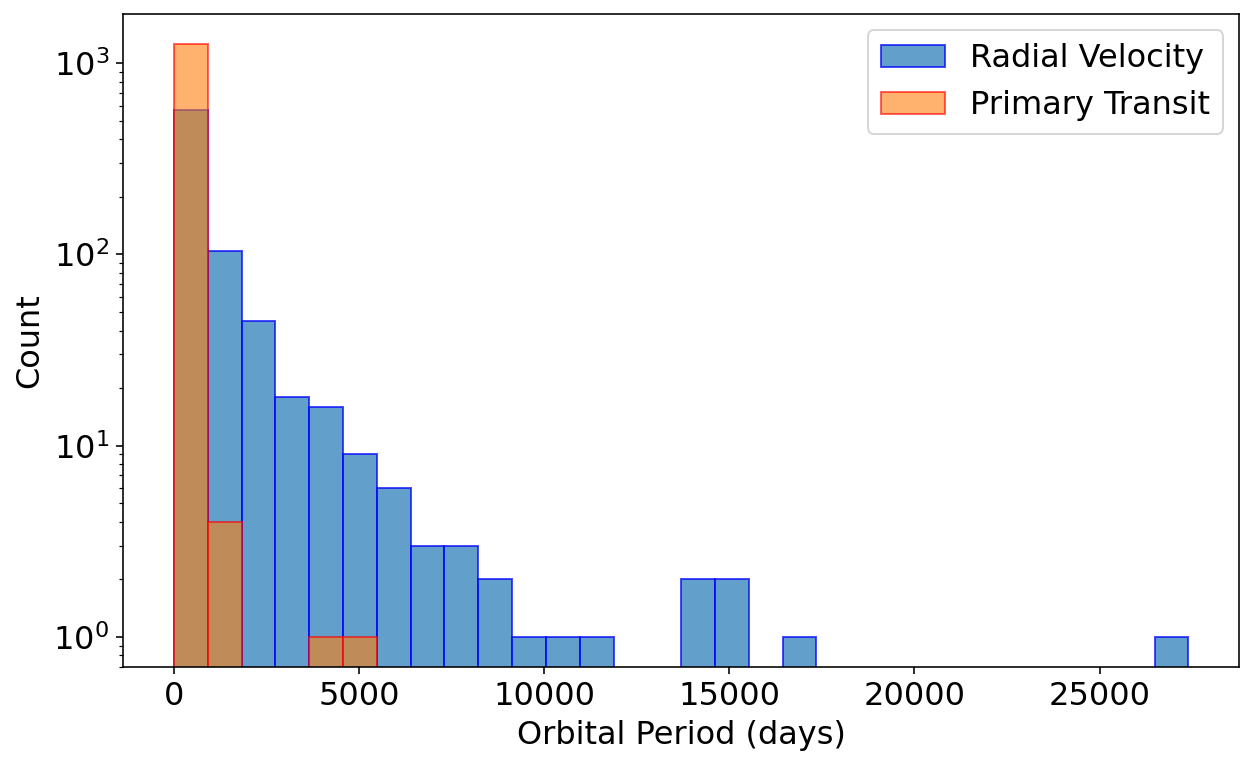

In [1300]:
bins = np.linspace(0,planet_df['orbital_period'].max(), 31)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.hist(planet_df['orbital_period'].where(planet_df['detection_type']=='Radial Velocity'), bins=bins, label='Radial Velocity', alpha=0.7, edgecolor='blue')
ax.hist(planet_df['orbital_period'].where(planet_df['detection_type']=='Primary Transit'), bins=bins, label='Primary Transit', alpha=0.6, edgecolor='red')
ax.set_xlabel('Orbital Period (days)')
ax.set_ylabel('Count')
ax.set_yscale('log') ## set the y-axis to log scale so we can see the details
ax.legend()
plt.show()

In [1301]:
low_mass_df = planet_df.where(planet_df['star_mass'] <=1.0).dropna()

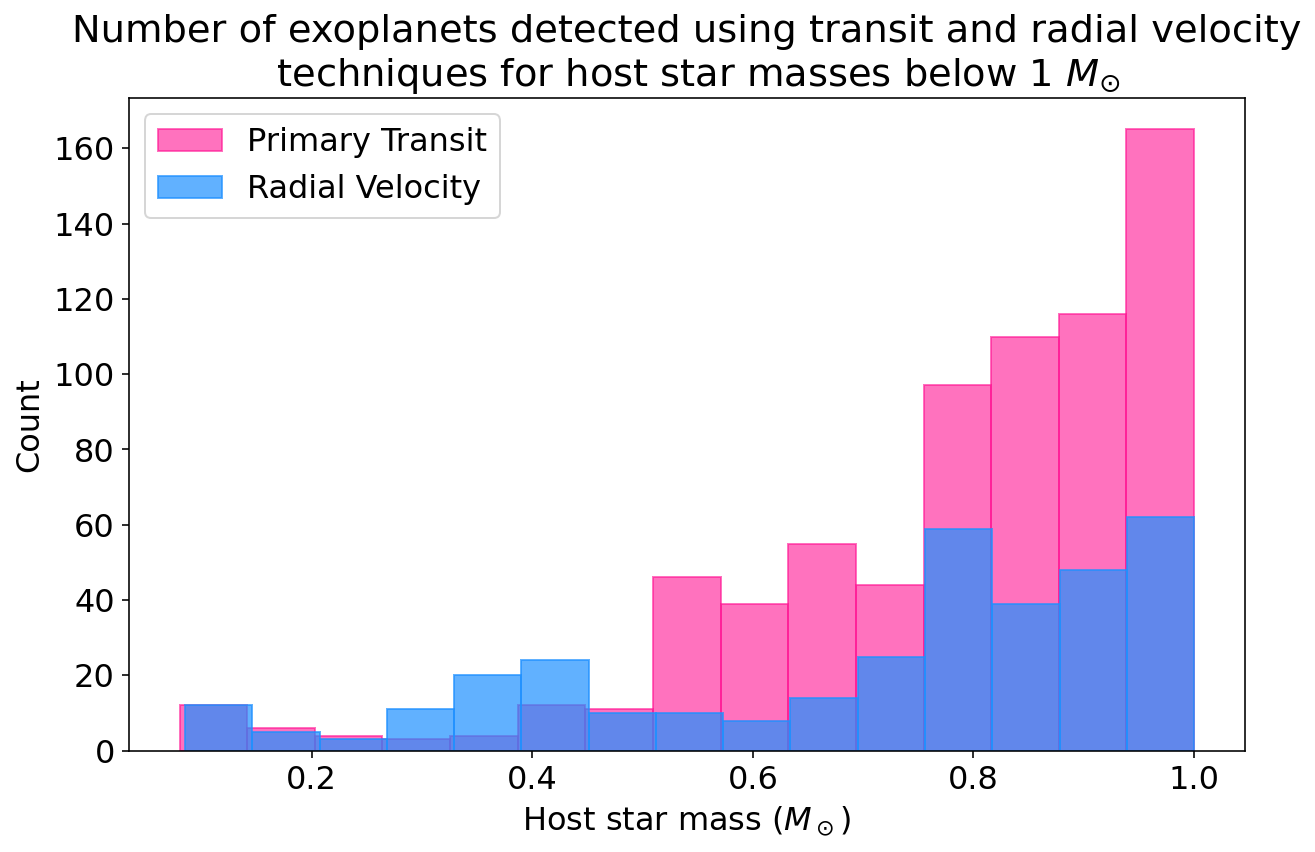

In [1302]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.hist(low_mass_df['star_mass'].where(low_mass_df['detection_type']=='Primary Transit'), bins=15, label='Primary Transit', alpha=0.6, color='DeepPink', edgecolor='DeepPink')
ax.hist(low_mass_df['star_mass'].where(low_mass_df['detection_type']=='Radial Velocity'), bins=15, label='Radial Velocity', alpha=0.7, color='DodgerBlue', edgecolor='DodgerBlue')
ax.set_xlabel('Host star mass ($M_\odot$)')
ax.set_ylabel('Count')
ax.legend()
ax.set_title('Number of exoplanets detected using transit and radial velocity\n  techniques for host star masses below 1 $M_{\odot}$')
plt.show()

In [1303]:
kepler_df = planet_df.where((planet_df['orbital_period'] <= 10000) & (planet_df['star_mass'] > 0.7)).dropna()

In [1304]:
kepler_df['orbital_period'].max()

9018.0

In [1305]:
kepler_df['star_mass'].min()

0.707

<AxesSubplot:>

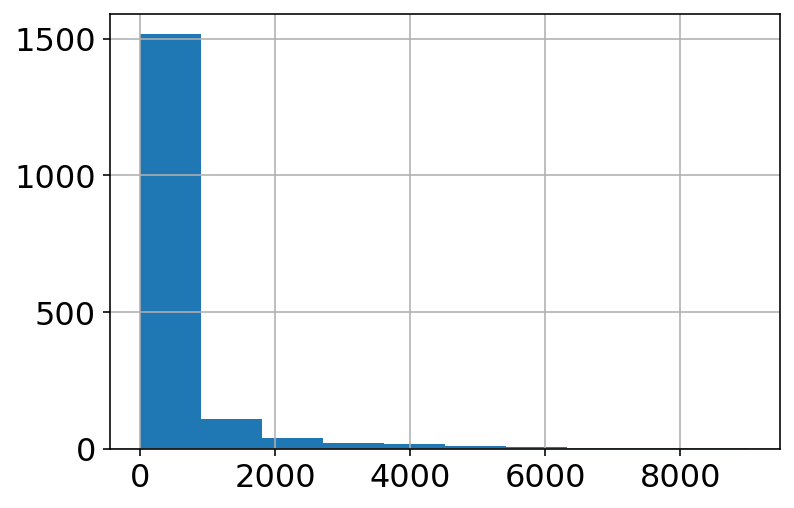

In [1306]:
kepler_df['orbital_period'].hist()

<AxesSubplot:>

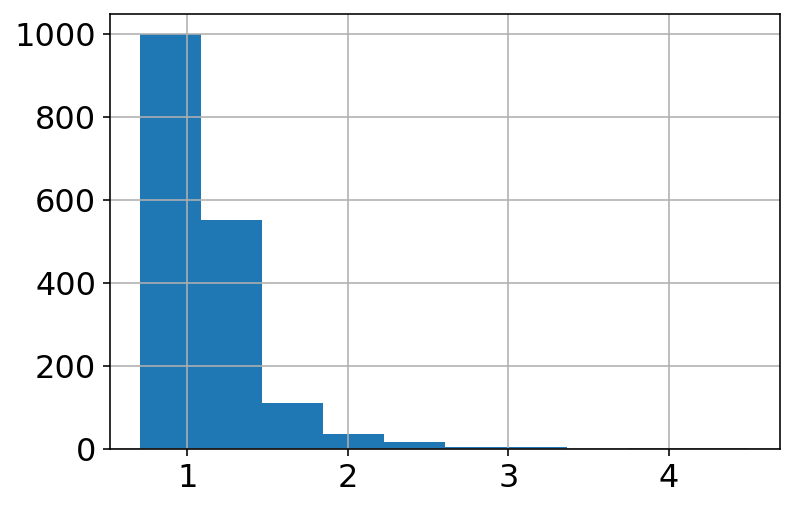

In [1307]:
kepler_df['star_mass'].hist()

In [1308]:
kepler_df['T_sq'] = kepler_df['orbital_period']**2

In [1309]:
kepler_df.head()

,name,orbital_period,semi_major_axis,detection_type,star_mass,T_sq
0,11 Com b,326.03,1.29,Radial Velocity,2.70,1.062956e+05
1,11 UMi b,516.22,1.54,Radial Velocity,1.80,2.664831e+05
2,14 And b,185.84,0.83,Radial Velocity,2.20,3.453651e+04
3,14 Her b,1773.40,2.77,Radial Velocity,0.90,3.144948e+06
4,16 Cyg B b,799.50,1.68,Radial Velocity,1.01,6.392002e+05


In [1310]:
kepler_df['a_3_m'] = kepler_df['semi_major_axis']**3 / kepler_df['star_mass']

In [1311]:
kepler_df.head()

,name,orbital_period,semi_major_axis,detection_type,star_mass,T_sq,a_3_m
0,11 Com b,326.03,1.29,Radial Velocity,2.70,1.062956e+05,0.795070
1,11 UMi b,516.22,1.54,Radial Velocity,1.80,2.664831e+05,2.029036
2,14 And b,185.84,0.83,Radial Velocity,2.20,3.453651e+04,0.259903
3,14 Her b,1773.40,2.77,Radial Velocity,0.90,3.144948e+06,23.615481
4,16 Cyg B b,799.50,1.68,Radial Velocity,1.01,6.392002e+05,4.694685


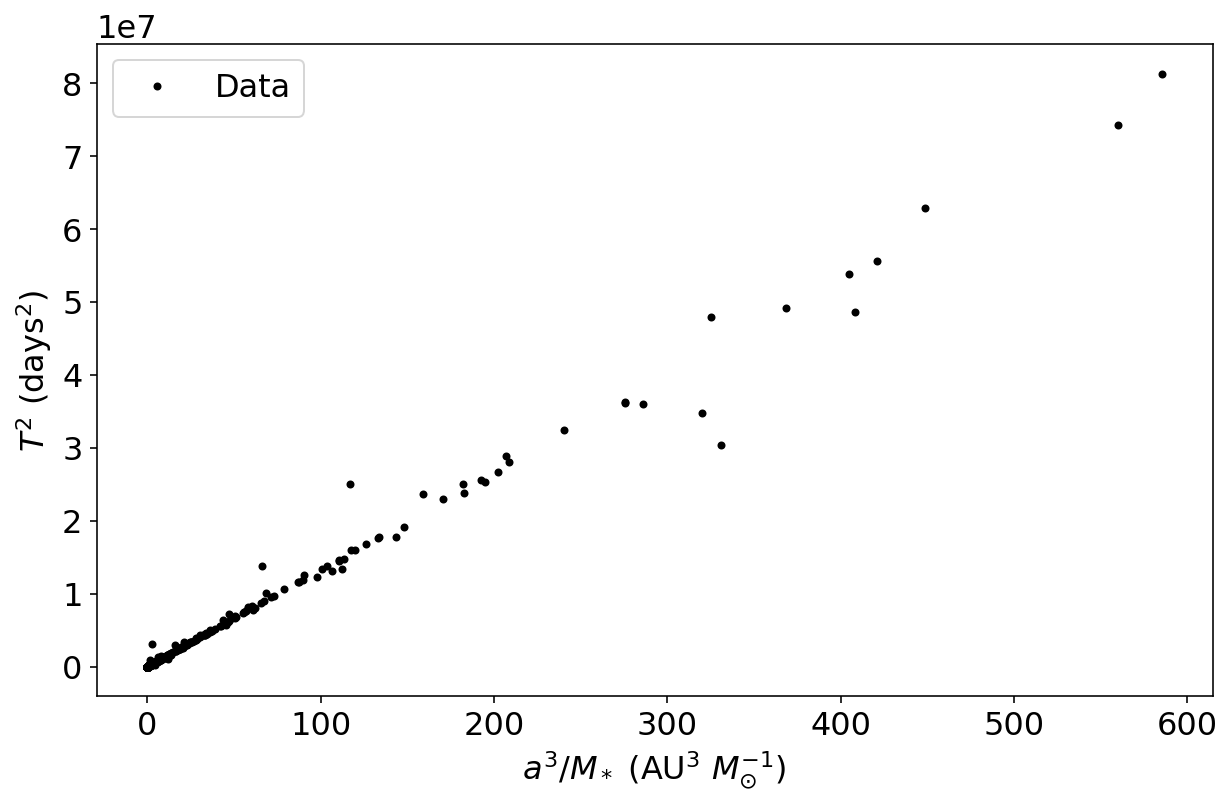

In [1312]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(kepler_df['a_3_m'], kepler_df['T_sq'], 'k.',ls='None', label='Data')
ax.set_ylabel('$T^2$ (days$^2$)')
ax.set_xlabel('$a^3 / M_*$ (AU$^3$ $M_{\odot}^{-1}$)')
ax.legend()
plt.show()

In [1313]:
kepler_df['orbital_period_sec'] = kepler_df['orbital_period'] * 24. * 60. * 60.
kepler_df['a_metres'] = kepler_df['semi_major_axis'] * 1.496E11
kepler_df['mass_kg'] = kepler_df['star_mass'] * 1.989E30

In [1314]:
kepler_df['a_3_m'] = kepler_df['a_metres']**3 / kepler_df['mass_kg']
kepler_df['T_sq'] = kepler_df['orbital_period_sec']**2

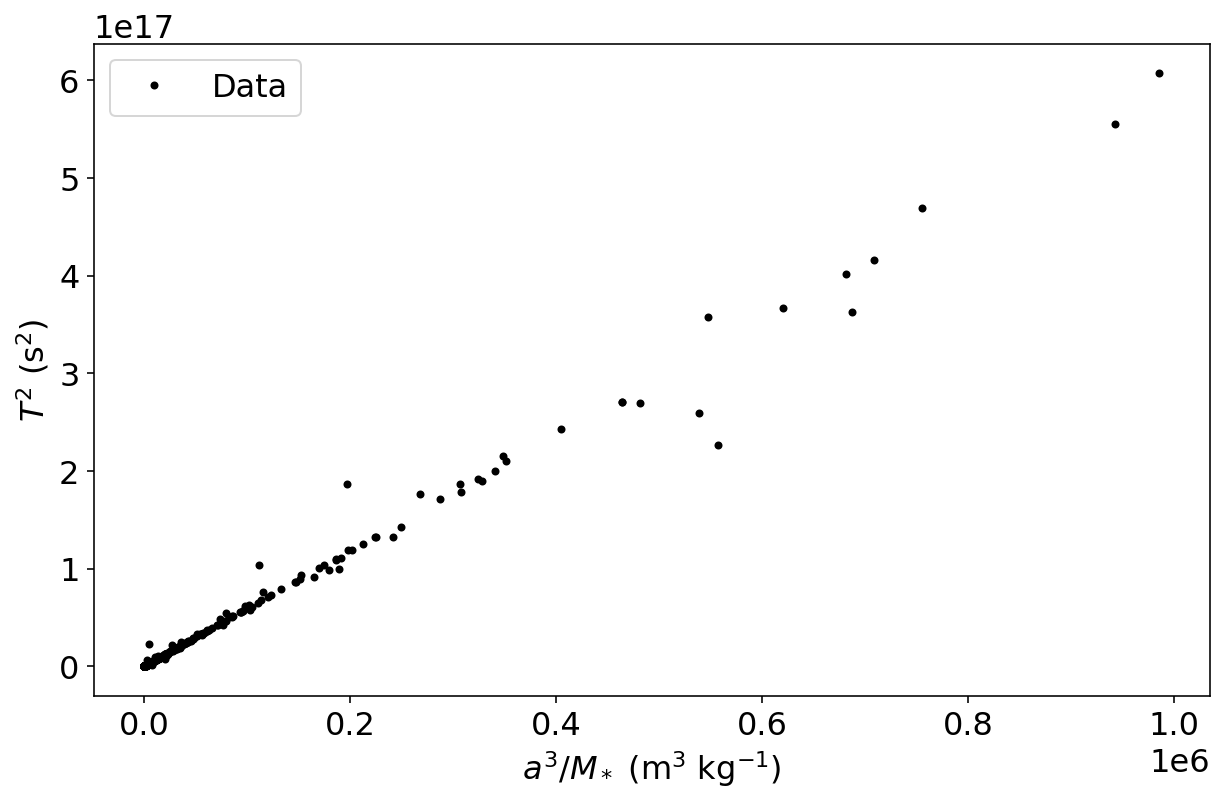

In [1315]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(kepler_df['a_3_m'], kepler_df['T_sq'], 'k.',ls='None', label='Data')
ax.set_ylabel('$T^2$ (s$^2$)')
ax.set_xlabel('$a^3 / M_*$ (m$^3$ kg$^{-1}$)')
ax.legend()
plt.show()

In [1316]:
def keplers_law(a_3_m, g):
    return (4.0 * np.pi**2  * a_3_m / g)

In [1317]:
popt, pcov = curve_fit(keplers_law, (kepler_df['a_3_m']), (kepler_df['T_sq']), p0=1e-11)
g = popt[0] 
g_unc = np.sqrt(pcov[0][0])
print("G = {0:.3e} +/- {1:.3e}".format(g, g_unc))

G = 6.753e-11 +/- 1.591e-13


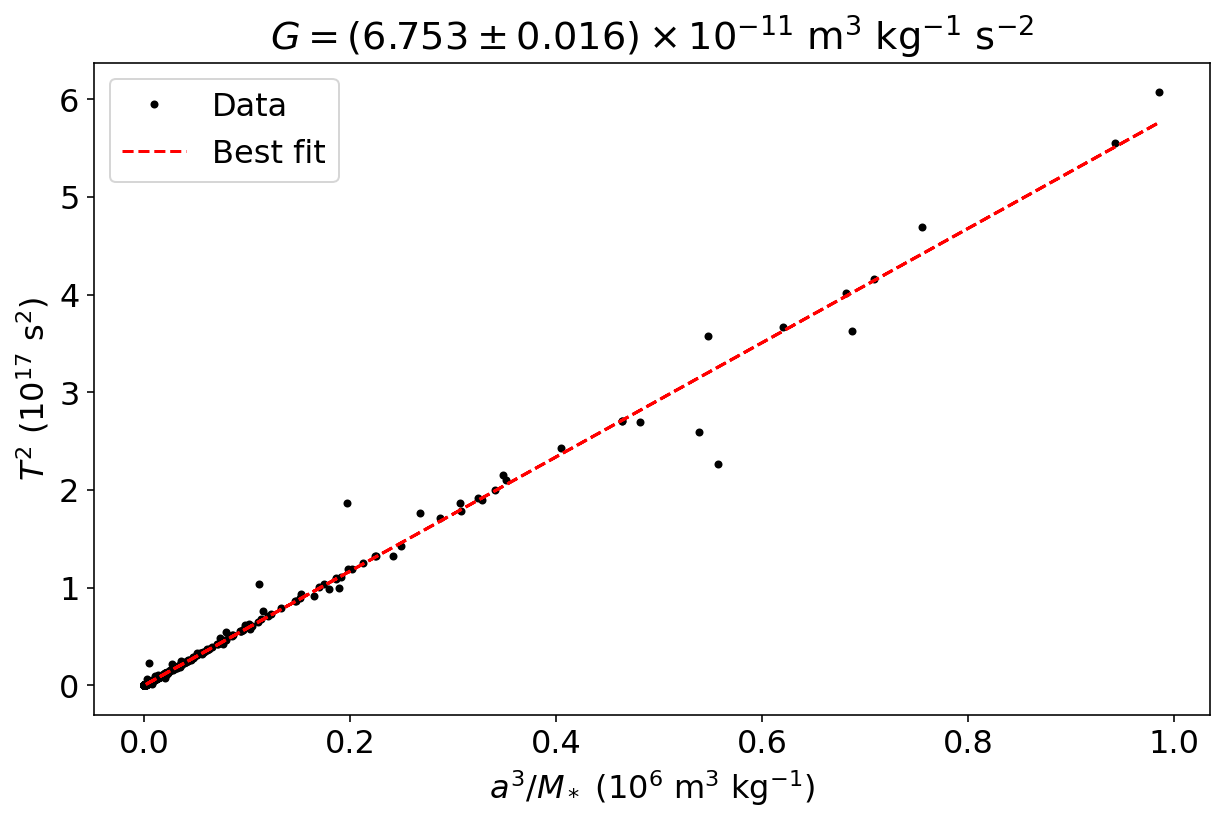

In [1318]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(kepler_df['a_3_m']/1e6, kepler_df['T_sq'] / 1e17, 'k.',ls='None', label='Data')
ax.plot(kepler_df['a_3_m']/1e6, keplers_law(kepler_df['a_3_m'], g)/1e17, 'r--', label='Best fit')
ax.set_ylabel('$T^2$ ($10^{17}$ s$^2$)')
ax.set_xlabel('$a^3 / M_*$ ($10^6$ m$^3$ kg$^{-1}$)')
title_string = (r'$G = ({0:.3f} \pm {1:.3f}) \times 10^{{-11}}$ m$^{{3}}$ kg$^{{-1}}$ s$^{{-2}}$'.format((g / 1e-11), (g_unc / 1e-11)))
ax.set_title(title_string)
ax.legend()
plt.show()

## Object-oriented programming

In [1319]:
class Robot:
    # Represents a robot, with a name
    
    population = 0
    # this variable counts the total number of robots we have
    
    def __init__(self, name):
        
        ## this initialises our data
        self.name = name
        print("Initialising {}".format(self.name))
        
        # when we add a robot we increase the population of robots
        Robot.population += 1
    
    def __del__(self):
        # This function kills robots :(
        print("{} is being destroyed!".format(self.name))
        
        Robot.population -= 1
        
        if Robot.population == 0:
            print("{} was the last robot :(".format(self.name))
        else:
            print("There are still {:d} robots left".format(Robot.population))

    def say_hi(self):
        # this makes the robot say hello
        print("Greetings! My name is {}.".format(self.name))

In [1320]:
droid1 = Robot("R2-D2")

Initialising R2-D2
R2-D2 is being destroyed!
R2-D2 was the last robot :(


In [1321]:
droid1.say_hi()

Greetings! My name is R2-D2.


In [1322]:
droid2 = Robot("C-3PO")

Initialising C-3PO
C-3PO is being destroyed!
C-3PO was the last robot :(


In [1323]:
droid2.say_hi()

Greetings! My name is C-3PO.


In [1324]:
droid3 = Robot("Jonny 5")

Initialising Jonny 5
Jonny 5 is being destroyed!
Jonny 5 was the last robot :(


In [1325]:
droid1.name

'R2-D2'

In [1326]:
droid2.name

'C-3PO'

In [1327]:
droid3.name

'Jonny 5'

In [1328]:
del droid1

R2-D2 is being destroyed!
There are still -1 robots left


In [1329]:
del droid2

C-3PO is being destroyed!
There are still -2 robots left


In [1330]:
del droid3

Jonny 5 is being destroyed!
There are still -3 robots left


## Further exercises

### Read in your data

In [1331]:
penguins_df = pd.read_csv('data/penguins_raw.csv')

In [1332]:
penguins_df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


In [1333]:
penguins_df[penguins_df.isna().any(axis=1)]

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,PAL0910,62,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N96A2,Yes,2009-11-27,46.8,16.5,189.0,3650.0,FEMALE,9.65061,-24.48153,NaN
338,PAL0910,63,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A1,Yes,2009-11-19,45.7,17.0,195.0,3650.0,FEMALE,9.26715,-24.31912,NaN
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


### Penguins love histograms

In [1334]:
penguins_df['Species'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Gentoo penguin (Pygoscelis papua)',
       'Chinstrap penguin (Pygoscelis antarctica)'], dtype=object)

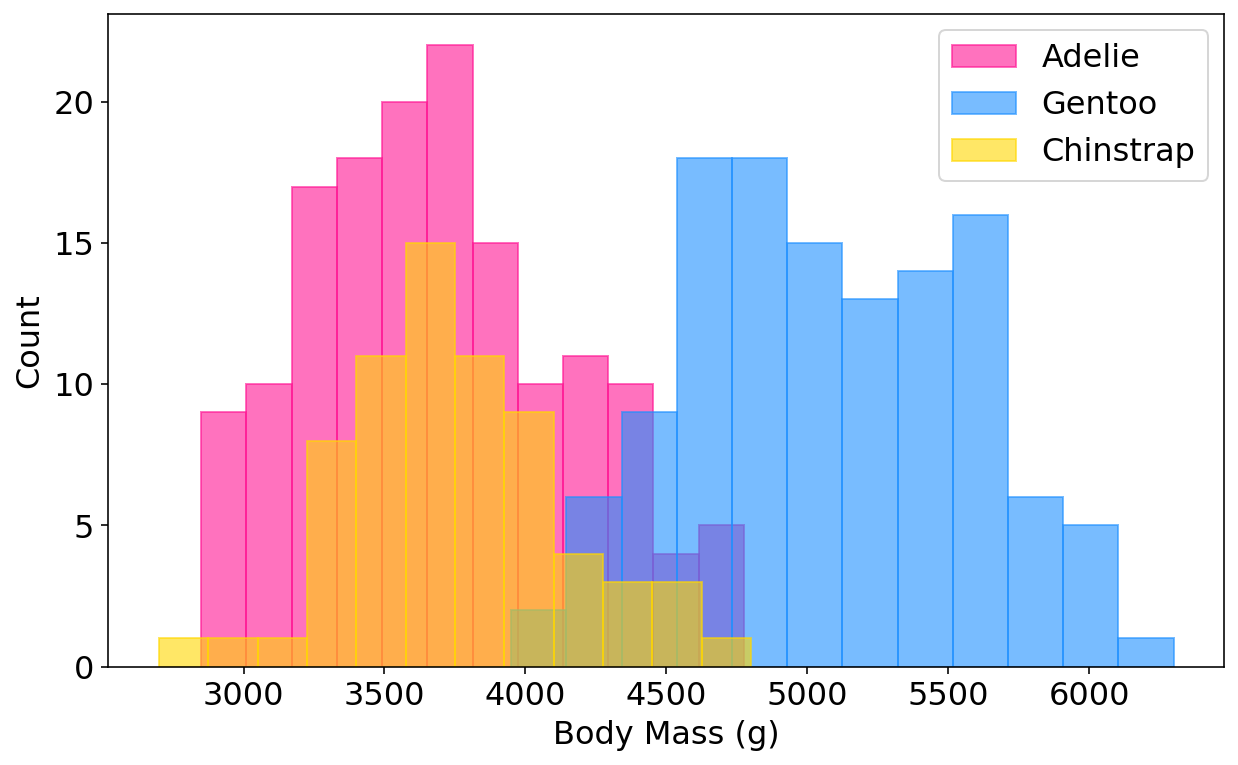

In [1335]:
# List of colors: https://xkcd.com/color/rgb/
# Matplotlib: https://matplotlib.org/stable/gallery/color/named_colors.html
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.hist(penguins_df['Body Mass (g)'].where(penguins_df['Species']=='Adelie Penguin (Pygoscelis adeliae)'), bins=12, label='Adelie', alpha=0.6, color='DeepPink', edgecolor='DeepPink')
ax.hist(penguins_df['Body Mass (g)'].where(penguins_df['Species']=='Gentoo penguin (Pygoscelis papua)'), bins=12, label='Gentoo', alpha=0.6, color='DodgerBlue', edgecolor='DodgerBlue')
ax.hist(penguins_df['Body Mass (g)'].where(penguins_df['Species']=='Chinstrap penguin (Pygoscelis antarctica)'), bins=12, label='Chinstrap', alpha=0.6, color='gold', edgecolor='gold')
ax.set_ylabel('Count')
ax.set_xlabel('Body Mass (g)')
ax.legend()
plt.show()

### What a big bill you have?

In [1336]:
penguins_df['Beak Volume (10^{-5} m^3)'] = np.array(penguins_df['Culmen Length (mm)'])*10**(-3)*(np.pi*np.array(penguins_df['Culmen Depth (mm)'])*10**(-3))**2/4/(10**(-5))

In [1337]:
def line(x, slope, intercept):
    return slope*x + intercept

In [1338]:
popt, pcov = curve_fit(line, penguins_df['Body Mass (g)'].where(penguins_df['Species']=='Adelie Penguin (Pygoscelis adeliae)').dropna()*10**(-3), penguins_df['Beak Volume (10^{-5} m^3)'].where(penguins_df['Species']=='Adelie Penguin (Pygoscelis adeliae)').dropna())
slope_1 = popt[0]
interc_1 = popt[1]
err_slope_1 = np.sqrt(pcov[0][0])
err_interc_1 = np.sqrt(pcov[1][1])

popt, pcov = curve_fit(line, penguins_df['Body Mass (g)'].where(penguins_df['Species']=='Gentoo penguin (Pygoscelis papua)').dropna()*10**(-3), penguins_df['Beak Volume (10^{-5} m^3)'].where(penguins_df['Species']=='Gentoo penguin (Pygoscelis papua)').dropna())
slope_2 = popt[0]
interc_2 = popt[1]
err_slope_2 = np.sqrt(pcov[0][0])
err_interc_2 = np.sqrt(pcov[1][1])

popt, pcov = curve_fit(line, penguins_df['Body Mass (g)'].where(penguins_df['Species']=='Chinstrap penguin (Pygoscelis antarctica)').dropna()*10**(-3), penguins_df['Beak Volume (10^{-5} m^3)'].where(penguins_df['Species']=='Chinstrap penguin (Pygoscelis antarctica)').dropna())
slope_3 = popt[0]
interc_3 = popt[1]
err_slope_3 = np.sqrt(pcov[0][0])
err_interc_3 = np.sqrt(pcov[1][1])

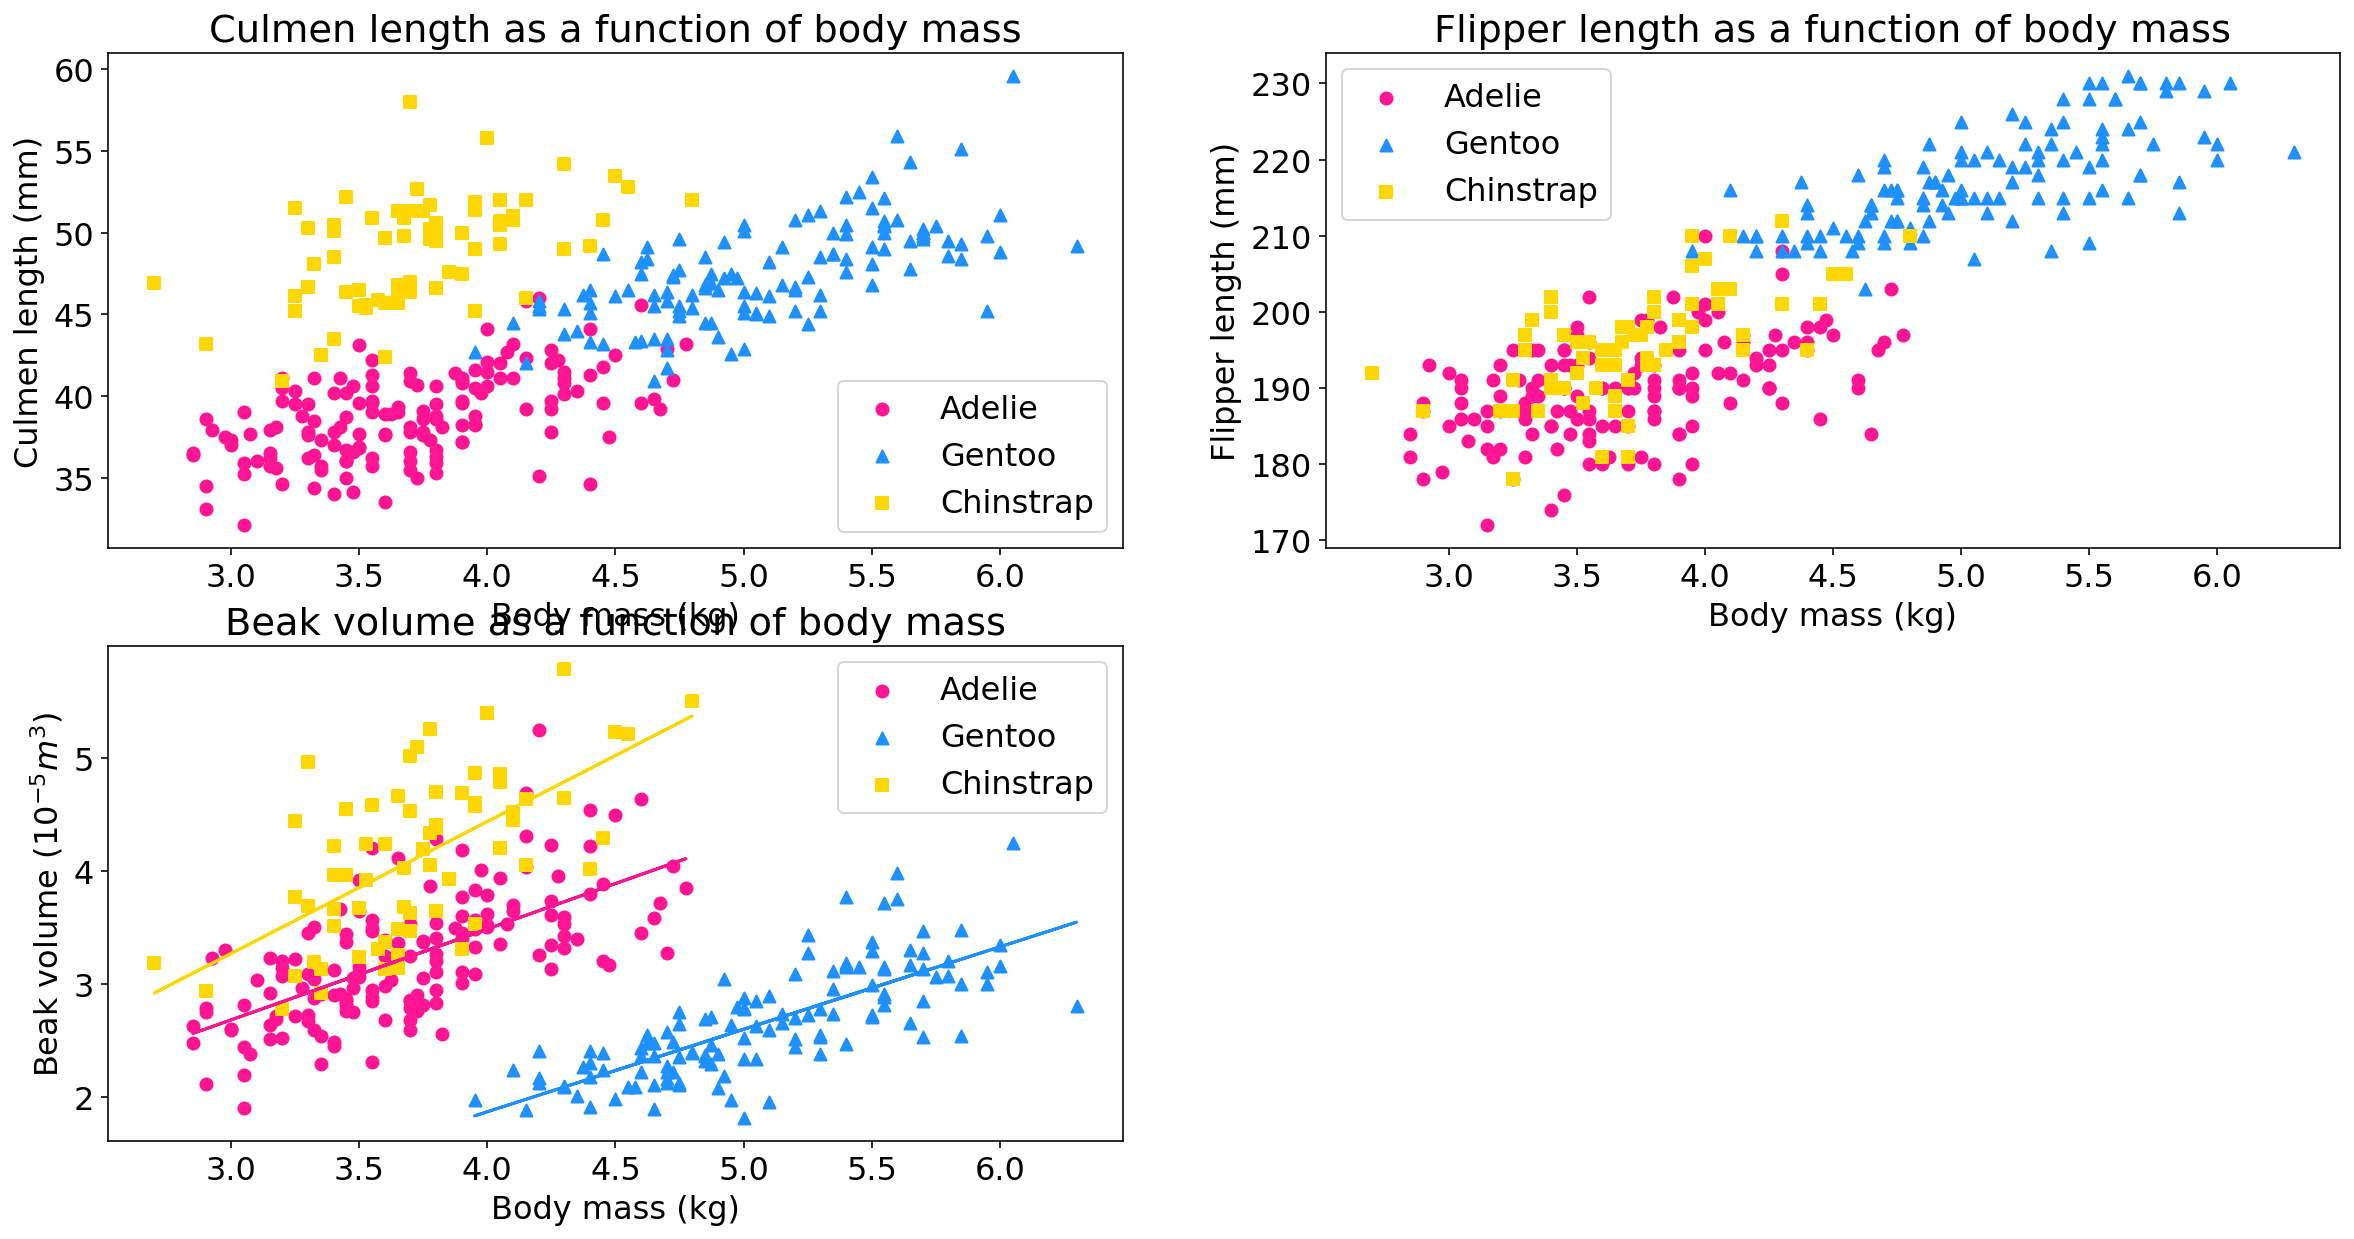

In [1339]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2,2,1)
ax.scatter(penguins_df['Body Mass (g)'].where(penguins_df['Species']=='Adelie Penguin (Pygoscelis adeliae)')*10**(-3), penguins_df['Culmen Length (mm)'].where(penguins_df['Species']=='Adelie Penguin (Pygoscelis adeliae)'), label='Adelie', color='DeepPink')
ax.scatter(penguins_df['Body Mass (g)'].where(penguins_df['Species']=='Gentoo penguin (Pygoscelis papua)')*10**(-3), penguins_df['Culmen Length (mm)'].where(penguins_df['Species']=='Gentoo penguin (Pygoscelis papua)'), label='Gentoo', color='DodgerBlue', marker='^')
ax.scatter(penguins_df['Body Mass (g)'].where(penguins_df['Species']=='Chinstrap penguin (Pygoscelis antarctica)')*10**(-3), penguins_df['Culmen Length (mm)'].where(penguins_df['Species']=='Chinstrap penguin (Pygoscelis antarctica)'), label='Chinstrap', color='gold', marker='s')
ax.set_ylabel('Culmen length (mm)')
ax.set_xlabel('Body mass (kg)')
ax.set_title('Culmen length as a function of body mass')
ax.legend()

ax = fig.add_subplot(2,2,2)
ax.scatter(penguins_df['Body Mass (g)'].where(penguins_df['Species']=='Adelie Penguin (Pygoscelis adeliae)')*10**(-3), penguins_df['Flipper Length (mm)'].where(penguins_df['Species']=='Adelie Penguin (Pygoscelis adeliae)'), label='Adelie', color='DeepPink')
ax.scatter(penguins_df['Body Mass (g)'].where(penguins_df['Species']=='Gentoo penguin (Pygoscelis papua)')*10**(-3), penguins_df['Flipper Length (mm)'].where(penguins_df['Species']=='Gentoo penguin (Pygoscelis papua)'), label='Gentoo', color='DodgerBlue', marker='^')
ax.scatter(penguins_df['Body Mass (g)'].where(penguins_df['Species']=='Chinstrap penguin (Pygoscelis antarctica)')*10**(-3), penguins_df['Flipper Length (mm)'].where(penguins_df['Species']=='Chinstrap penguin (Pygoscelis antarctica)'), label='Chinstrap', color='gold', marker='s')
ax.set_ylabel('Flipper length (mm)')
ax.set_xlabel('Body mass (kg)')
ax.set_title('Flipper length as a function of body mass')
ax.legend()

ax = fig.add_subplot(2,2,3)
ax.scatter(penguins_df['Body Mass (g)'].where(penguins_df['Species']=='Adelie Penguin (Pygoscelis adeliae)')*10**(-3), penguins_df['Beak Volume (10^{-5} m^3)'].where(penguins_df['Species']=='Adelie Penguin (Pygoscelis adeliae)'), label='Adelie', color='DeepPink')
ax.scatter(penguins_df['Body Mass (g)'].where(penguins_df['Species']=='Gentoo penguin (Pygoscelis papua)')*10**(-3), penguins_df['Beak Volume (10^{-5} m^3)'].where(penguins_df['Species']=='Gentoo penguin (Pygoscelis papua)'), label='Gentoo', color='DodgerBlue', marker='^')
ax.scatter(penguins_df['Body Mass (g)'].where(penguins_df['Species']=='Chinstrap penguin (Pygoscelis antarctica)')*10**(-3), penguins_df['Beak Volume (10^{-5} m^3)'].where(penguins_df['Species']=='Chinstrap penguin (Pygoscelis antarctica)'), label='Chinstrap', color='gold', marker='s')
ax.plot(penguins_df['Body Mass (g)'].where(penguins_df['Species']=='Adelie Penguin (Pygoscelis adeliae)')*10**(-3), \
    slope_1*penguins_df['Body Mass (g)'].where(penguins_df['Species']=='Adelie Penguin (Pygoscelis adeliae)')*10**(-3)+interc_1, color='DeepPink')
ax.plot(penguins_df['Body Mass (g)'].where(penguins_df['Species']=='Gentoo penguin (Pygoscelis papua)')*10**(-3), \
    slope_2*penguins_df['Body Mass (g)'].where(penguins_df['Species']=='Gentoo penguin (Pygoscelis papua)')*10**(-3)+interc_2, color='DodgerBlue')
ax.plot(penguins_df['Body Mass (g)'].where(penguins_df['Species']=='Chinstrap penguin (Pygoscelis antarctica)')*10**(-3), \
    slope_3*penguins_df['Body Mass (g)'].where(penguins_df['Species']=='Chinstrap penguin (Pygoscelis antarctica)')*10**(-3)+interc_3, color='gold')
ax.set_ylabel('Beak volume ($10^{-5} m^3$)')
ax.set_xlabel('Body mass (kg)')
ax.set_title('Beak volume as a function of body mass')
ax.legend()
plt.show()